##### <table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 8</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 13. Juni, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Bitte geben Sie ihren Namen an</font></p>

<p>**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Allerlei aus dem Potentialtopf</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(5 Punkte)</td></tr></table>

In unserem ersten Beispiel wollen wir ein quantenmechanisches Teilchen verfolgen, welches wir nicht nur in eine Raumdimension zwängen sondern auch noch in einen sogenannten **Potentialtopf** sperren. Eine derartige Situation lässt sich dann durch die *zeitunabhängige* Schrödinger-Gleichung in einer Dimension

\begin{equation}
\left[-\frac{1}{2}\frac{d^2}{d x^2} + V(x)\right]\psi(x) = E\psi(x) \,,
\end{equation}

beschreiben, wobei wir $\hbar=m=1$ gesetzt haben. Beachten Sie, dass es sich hierbei um eine *gewöhnliche* Differentialgleichung handelt.

Diese Schrödinger-Gleichung wollen wir nun für verschiedene Potentiale $V(x)$ - etwa jene, die in der Abbildung dargestellt sind - anhand des in der Vorlesung vorgestellten **Numerov-Algorithmus** numerisch exakt 
lösen.

**Potentialtöpfe**

Dazu können wir wie folgt vorgehen: Wir diskretisieren die $x$-Achse im Bereich -$1.0 \leq x \leq 1.0$ in 1000 Abschnitte der
Größe $\Delta x = 0.002$. Des weiteren benötigen wir für das Numerov-Verfahren, in welchem wir die Schrödinger-Gleichung vom linken zum rechten Rand entlang der obigen Diskretisierungsschritte integrieren wollen, zwei Startwerte.

Dazu vergegenwärtigen wir uns zum einen, dass die Wellenfunktion an den Rändern des Potentialtopfes wegen der unendlich hohen Wände verschwinden muss, wohingegen die Wellenfunktion innerhalb des Potentialtopfes durchaus einen endlichen Wert annehmen kann. Dies wollen wir mit den folgenden Startwerten des Numerov-Verfahrens in der Nähe des linken Randes wie folgt modellieren:

\begin{align}
\psi(x = -1.000) &= 0 \,, \\
\psi(x = -0.998) &= 0.5 \,,
\end{align}

wobei die exakte Wahl des endlichen Wertes für $\psi(x = -0.998)$ unerheblich ist, da wir die Wellenfunktion nach Integration durch das Numerov-Verfahren unabhänging von dieser Wahl normieren müssen.

#### Aufgaben

<img src="http://www.thp.uni-koeln.de/trebst/Lectures/CompPhys-2016/08_potentiale.png" width="80%"/>

Führen Sie die Numerov-Integration für die dargestellten Potentiale und verschiedene fixe Energien $E$ aus, also zum Beispiel für 250 äquidistante Energiewerte im Bereich $-5 \leq E \leq 95$ und plotten Sie jeweils den Wert von $\psi(x = +1)$ als Funktion der Energie.

Die Nullstellen dieser Funktion entsprechen den erlaubten Eigenenergien, denn nur dann wird auch die Randbedingung am *rechten* Rand erfüllt, wo die Wellenfunktion ebenfalls verschwinden muss, d.h. $\psi(x = +1) = 0$.

# functions

### Numerov

$$ \psi_{n+1} = \frac{\left(2-\frac{5}{6}h^2k_n^2\right)\psi_n - \left(1+\frac{1}{12}h^2k_{n-1}^2\right)\psi_{n-1}}{1+\frac{1}{12}h^2k_{n+1}^2} $$

In [1]:
function numerov(xs, psi_pprev, psi_prev;  V=x->0, E=0, hbar=1, m=1)
    # psi_pprev = psi0 = psi(xs[1])
    # psi_prev  = psi1 = psi(xs[2])
    const N = length(xs)
    const h = (xs[end]-xs[1])/N
    k(x)    = 2m/hbar^2*(E-V(x)) # is same as k^2

    psi = 0. # initial definition
    for i in 3:N
        # calc new psi
        psi = ((2-5/6*h^2*k(xs[i-1]))*psi_prev-(1+1/12*h^2*k(xs[i-2]))*psi_pprev)/(1+1/12*h^2*k(xs[i]))
        
        # set new vars for next iteration
        psi_prev, psi_pprev = psi, psi_prev
    end

    return psi
end

numerov (generic function with 1 method)

In [2]:
function function_part(x0, x1, f)
    # V(x) = function_part(...)(x)
    return x->(x0<=x<=x1) ? f(x) : 0
end

function_part (generic function with 1 method)

In [3]:
function set_potential_box(V0, x0, x1)
    g(x) = V0
    # V(x) = set_potential_box(...)(x)
    return function_part(x0, x1, g)
end

function set_potential_box_slope(V0, V1, x0, x1)
    m = (V1 - V0)/(x1 - x0)
    b = (V0 + V1)/2
    f(x) = b + m*x # linear function
    # V(x) = set_potential_box_slope(...)(x)
    return function_part(x0, x1, f)
end

function set_potential_gridded(V0, Vwall, x0, x1; wall_width=0.1)
    # 4 walls
    # constants
    const d = (x1-x0-4*wall_width)/5  # distance between walls
    
    # define single wall with heigth "Vwall" and width "wall_width"
    pot(x) = function_part(x0, x1, x->V0)
    wall(x, pos) = function_part(x0+pos, x0+pos+wall_width, x->V0+Vwall)(x)
   
    # set full potential
    V(x) =  wall(x, d) + wall(x, 2d+wall_width) + wall(x, 3d+2wall_width) + wall(x, 4d+3wall_width)
    
    # V(x) = set_potential_box_slope(...)(x)
    return V
end

set_potential_gridded (generic function with 1 method)

In [4]:
function calculate(V, text, xs, Es)
    border= []
    for e in Es
        push!(border, numerov(xs, 0, 0.5, V=V, E=e))
    end
    return (text, border)
end

calculate (generic function with 1 method)

# calculate

In [5]:
const xs = collect(linspace(-1, 1, 1e3))
const Es = collect(linspace(-5, 95, 300))
const x0 = -1
const x1 = +1
;

In [6]:
using PyPlot

### a

In [7]:
V0a   = -70
Va(x) = set_potential_box(V0a, x0, x1)(x)
texts = L"V_a" #"Kastenpotential der Tiefe $V0"
A     = calculate(Va, texts, xs, Es);

### b

In [8]:
V0b   = -50
V1b   = -100
Vb(x) = set_potential_box_slope(V0b, V1b, x0, x1)(x)
texts = L"V_b" # "schräges Kastenpotential, V0=$V0; V1=$V1"
B     = calculate(Vb, texts, xs, Es);

### c

In [9]:
V0c   = -50
V1c   = -50
Vc(x) = set_potential_gridded(V0c, V1c, x0, x1)(x)
texts = L"V_c" # "Kastenpotential mit Kästen, V0=$V0, V1=$V1"
C     = calculate(Vc, texts, xs, Es);

# plot

## all

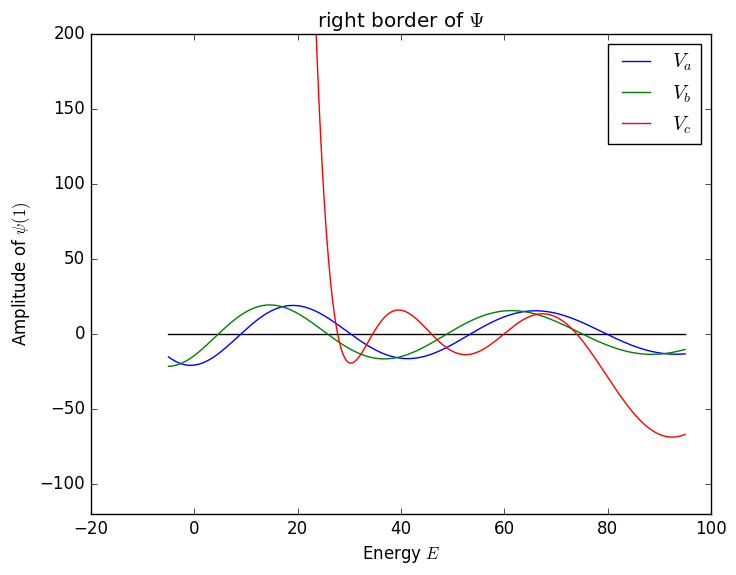

In [10]:
figure()
title(L"right border of $\Psi$")
xlabel(L"Energy $E$")
ylabel(L"Amplitude of $\psi(1)$")
plot(Es, zeros(Es), color="black")

for (titles, border) in (A, B, C)
#    title(titles)
    plot(Es, border, label=titles)
end

ylim(-120, 200)
legend()
;

## potentials

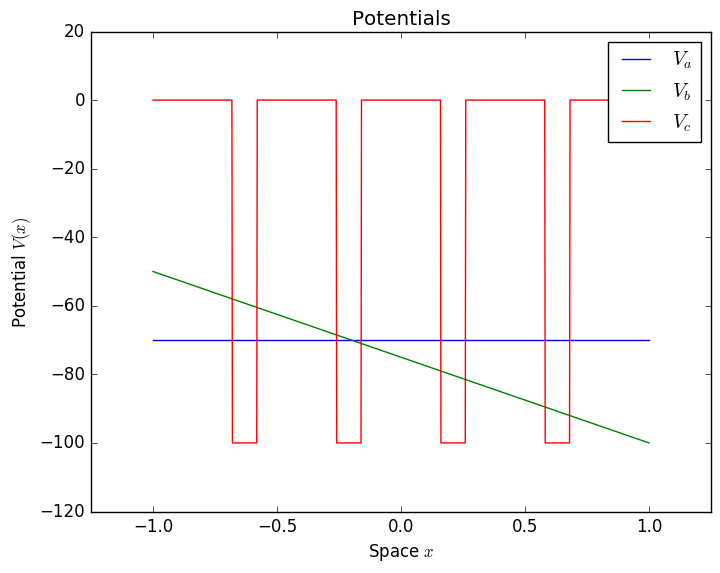

In [11]:
figure()
title("Potentials")
xlabel(L"Space $x$")
ylabel(L"Potential $V(x)$")
xlim(-1.25, 1.25)
ylim(-120, 20)

for (Vi, text) in ((Va, L"V_a"), (Vb, L"V_b"), (Vc, L"V_c"))
    v = []
    for x in xs
        push!(v, Vi(x))
    end
    
    plot(xs, v, label=text)
end
legend()
;